1. Provide the overall sentiment score given a speech
- Filter df1 for the sentiment score for the speech


In [70]:
def sentiment_score(year):
    import pandas as pd
    import numpy as np
    
    #Load Files
    df_paras = pd.read_csv('sentiment_score_paras.csv')
    df_overall = pd.read_csv('sentiment_score_overall.csv')
    
    #Returns the overall sentiment score
    overall_score  = df_overall[df_overall['Year'] == year]['Sentiment Score'].values[0]
    overall_sentiment = df_overall['Sentiment'][df_overall['Year']==year].values[0]
    language = ['English' if year[5]=='e' else 'Chinese' if year[5]=='c' else 'Malay']
    return f'The overall sentiment of the National Day Rally {year[0:4]} ({language[0]}) language is {overall_sentiment.lower()} with a score of {overall_score:.3f}.'    
#Test
sentiment_score('2015_eng.txt')

'The overall sentiment of the National Day Rally 2015 (English) language is positive with a score of 0.645.'

2. In the speech, locate the paragraphs that the keyword was mentioned and produce a graph where we highlight the sentiment of those paras?
- Filter df2 by name of the speech
- In the paras column, search for the keyword and return rows with keyword 
- Add in a scatter


In [68]:
def sentiment_paras(year, keyword):
    import pandas as pd
    import numpy as np
    
    #Load Files
    df_paras = pd.read_csv('sentiment_score_paras.csv')
    df_overall = pd.read_csv('sentiment_score_overall.csv')
    
    df = df_paras[df_paras['Year'] == year]

    #Search in columns 'Clean_Text' for keyword
    mask = df['Clean_Text'].str.contains(keyword, na=False)
    keyword_rows = df[mask]
    
    #Return selected columns including 'Paragraphs' which is the original para before cleaning
    pd.set_option('display.max_colwidth', None)
    return keyword_rows[['Year','ParasNo','Paragraphs','Sentiment Score', 'Sentiment']]
        
    try:
        keyword_positive = keyword_rows.Sentiment.value_counts()['POSITIVE']
    except:
        keyword_positive = 0

    try:
        keyword_negative = keyword_rows.Sentiment.value_counts()['NEGATIVE']
    except:
        keyword_negative = 0
    
     
    #Issue: cannot return this sentence
    return f'There were {keyword_positive} paragraphs with positive sentiment and {keyword_negative} paragraphs with negative sentiment.'
    
#test
sentiment_paras('2015_eng.txt', 'malay')

,Year,ParasNo,Paragraphs,Sentiment Score,Sentiment
1745,2015_eng.txt,6,"We were a poor third world country; people lived in cramped and squalid slums, no modern sanitation, no utilities, but we built HDB flats to house all of us and made Singapore a first world metropolis and our beautiful home. Nearly all our water came from Johor and every now and again when an issue arose with Malaysia, some crazy politician would threaten to turn off the tap, to get us in line, but we did not die of thirst. We cleaned up our rivers, we dammed them up to become reservoirs, we built Marina Barrage and turned Marina Bay into Marina reservoir. Our whole island became a catchment area. We invented NEWater and on National Day 2002, we toasted our success. Huat Ah!",0.7826,Positive
1746,2015_eng.txt,7,"Thirdly, we celebrated our journey from third world to first as one united people. When we separated from Malaysia, we were not yet one people. Memories of the race riots were fresh and raw. The minorities were uncertain of their place in the new country. They saw what had happened in Malaysia. They wondered, will the new Singapore Government keep its promise of a multi-racial society. But 50 years on, we celebrate as one united people. On National Day, when the siren sounded, we stood and recited the Pledge together - regardless of race, language or religion. We sang Majulah Singapura.",0.9109,Positive
1748,2015_eng.txt,9,"Multiracialism\nFirst of all, multi-racialism. We separated from Malaysia because we believed in this ideal of a multi-racial society. We believed that before race, language and religion, we should first and foremost be Singaporean. That was the fundamental reason for our foundation as a country. So we came down hard on chauvinists and racial extremists. We built HDB estates where all the different races lived and mingled together. There are no segregated ghettos in Singapore. We made English our working language and gradually all our schools shifted to teaching in English. We created Group Representation Constituencies (GRCs) so that minorities would always be represented in Parliament and this way, we encouraged all the communities to come together and yet gave each community space to maintain their own cultures and their own ways of life. When delicate and awkward issues arose, we dealt with them together.",0.6705,Positive
1749,2015_eng.txt,10,"For example, when we discovered the Jemaah Islamiyah group, planning to set off suicide bombs in Singapore after 9/11, we handled it as one people; we did not divide into Muslims and non-Muslims. At the same, we made the effort to bring everybody together and to ensure that every community could hold his own and not be left behind. So we set up self-help groups, the communities did, starting with the Council for the Development of Singapore Malay/Muslim Community (Mendaki), later the Singapore Indian Development Association (SINDA), then Chinese Development Assistance Council (CDAC) and the Association of Muslim Professionals (AMP) and the Eurasian Association. The Government supported them and so we progressed together.",0.2732,Positive
1750,2015_eng.txt,11,"Therefore, for SG50, every community in Singapore is celebrating because every community has progressed with the nation. And each group is celebrating with the other groups because we are one united people. I have attended many SG50 celebrations this year – a Catholic Jubilee Mass at the Indoor Stadium; the SG50 Kita National Day Observance Ceremony here in this campus, led by the Malay/ Muslim organisations but with other groups participating; a Buddhist celebration at the Indoor Stadium; a Protestant prayer event at the National Stadium; a joint concert organised by the Taoist Federation; the New Creation Church and others at the Star Performing Arts Centre. Here you see, one of the items - a Chinese Kungfu group performing with the Silat group. One function. At one dinner, I had sitting around my table representatives of all th

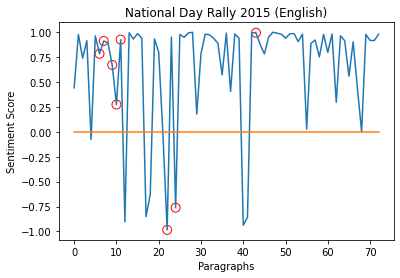

In [69]:
def sentiment_chart(year, keyword):

    #Import Libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    #Load Files
    df_paras = pd.read_csv('sentiment_score_paras.csv')
    df_overall = pd.read_csv('sentiment_score_overall.csv')

    #New df
    df = df_paras[df_paras['Year'] == year]

    #Search in columns 'Clean_Text' for keyword
    mask = df['Clean_Text'].str.contains(keyword, na=False)
    keyword_rows = df[mask]

    #Plotting
    plt.plot(df['ParasNo'],df['Sentiment Score'])
    plt.plot(np.arange(0,len(df[df['Year'] == year])), np.zeros(len(df[df['Year'] == year]))) # add a neutral line

    plt.scatter(keyword_rows['ParasNo'],keyword_rows['Sentiment Score'], s=80, facecolors='none', edgecolors='r')

    #Plot Axis
    language = ['English' if year[5]=='e' else 'Chinese' if year[5]=='c' else 'Malay']
    plt.title(f'National Day Rally {year[0:4]} ({language[0]})')
    plt.xlabel('Paragraphs')
    plt.ylabel('Sentiment Score')

    plt.show()

    #test
sentiment_chart('2015_eng.txt', 'malay')